In [0]:
from google.colab import files 
uploaded = files.upload() 

Saving lemon1.jpg to lemon1.jpg
Saving lemon2.jpg to lemon2.jpg
Saving lemon3.jpg to lemon3.jpg
Saving lemon4-586.jpg to lemon4-586.jpg
Saving lemon6.jpg to lemon6.jpg
Saving lemon7.jpg to lemon7.jpg


In [0]:
import os
img_list = list(filter(lambda x: '.jpg' in x, os.listdir()))

In [0]:
!pip install ipython-autotime
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=b3dab4a7665cca2e6ccf0c1ca71f5125e284b24b222727bca7a68aaae753de97
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [0]:
%load_ext autotime

In [0]:
images = []
segmented = []
titles = []
for i in img_list:
	image = cv2.imread(i)
	gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
	hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
	l_b = np.array([0,139,32])
	u_b = np.array([60,255,255])
	thresh = cv2.inRange(hsv,l_b,u_b)
	res = cv2.bitwise_and(image,image,mask = thresh)
	segmented.append(np.copy(res))
	D = ndimage.distance_transform_edt(thresh)
	localMax = peak_local_max(D, indices=False, min_distance=20,
		labels=thresh)


	markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
	labels = watershed(-D, markers, mask=thresh)
	titles.append("{} LEMONS".format(len(np.unique(labels)) - 1))


	for label in np.unique(labels):
		if label == 0:
			 continue
		mask = np.zeros(gray.shape, dtype="uint8")
		mask[labels == label] = 255
		# detect contours in the mask and grab the largest one
		cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
			cv2.CHAIN_APPROX_SIMPLE)
		cnts = imutils.grab_contours(cnts)
		c = max(cnts, key=cv2.contourArea)
			
		((x, y), r) = cv2.minEnclosingCircle(c)
		cv2.circle(image, (int(x), int(y)), int(r), (255, 0, 0), 2)
		#cv2.putText(image, "{}".format(label), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
	images.append(np.copy(image))

time: 989 ms


Color-segmented Images


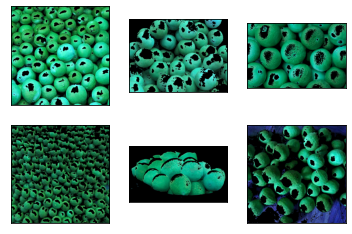

time: 478 ms


In [0]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(segmented[i])
    plt.xticks([]),plt.yticks([])
print('Color-segmented Images')

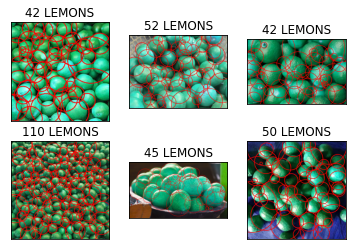

time: 508 ms


In [0]:

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])